In [1]:
#Import Modules
import math
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
df = pd.read_csv('SPX_5min.txt')

In [3]:
df.head()

,2007-04-30 09:25:00,1494.07,1494.07.1,1494.07.2,1494.07.3
0,2007-04-30 09:30:00,1494.07,1495.36,1494.07,1495.09
1,2007-04-30 09:35:00,1495.13,1495.13,1493.48,1493.48
2,2007-04-30 09:40:00,1493.02,1493.27,1491.92,1492.53
3,2007-04-30 09:45:00,1492.53,1493.23,1492.19,1492.25
4,2007-04-30 09:50:00,1492.31,1493.75,1492.31,1493.54


In [4]:
df['Time'] = df['2007-04-30 09:25:00']
df['Open'] =df['1494.07']
df['High'] = df['1494.07.1']
df['Low'] = df['1494.07.2']
df['Close'] = df['1494.07.3']

In [5]:
df = df.drop(columns=['2007-04-30 09:25:00', '1494.07', '1494.07.1','1494.07.2', '1494.07.3'])

In [6]:
df.head()

,Time,Open,High,Low,Close
0,2007-04-30 09:30:00,1494.07,1495.36,1494.07,1495.09
1,2007-04-30 09:35:00,1495.13,1495.13,1493.48,1493.48
2,2007-04-30 09:40:00,1493.02,1493.27,1491.92,1492.53
3,2007-04-30 09:45:00,1492.53,1493.23,1492.19,1492.25
4,2007-04-30 09:50:00,1492.31,1493.75,1492.31,1493.54


In [7]:
df.shape

(307441, 5)

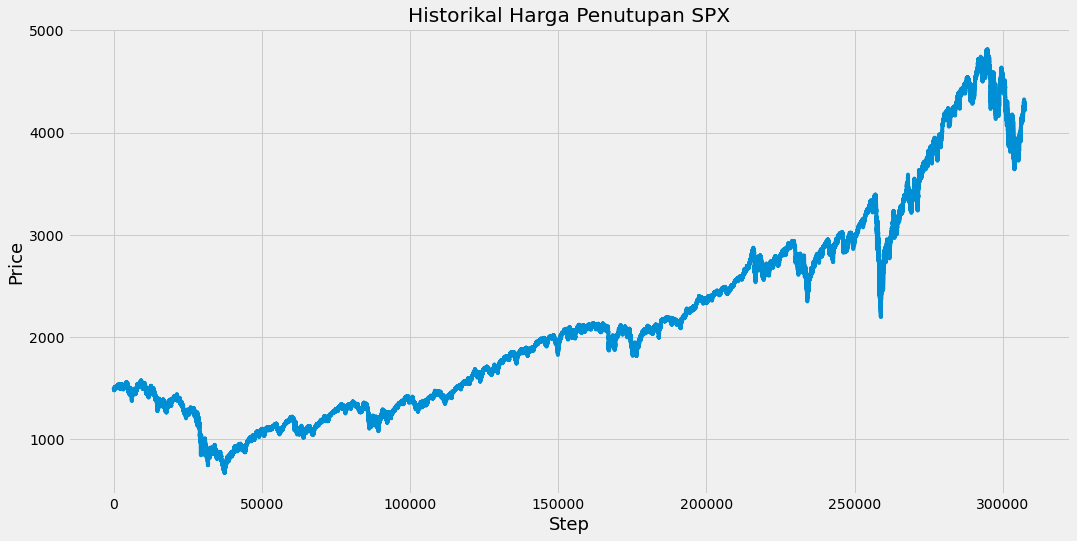

In [8]:
plt.figure(figsize=(16,8))
plt.title('Historikal Harga Penutupan SPX')
plt.plot(df['Close'])
plt.ylabel('Price', fontsize=18)
plt.xlabel('Step', fontsize=18)
plt.show()

In [9]:
#Kita ambil hanya kolom harga penutupan
data = df.filter(['Close'])

In [10]:
#kita ambil hanya nilainya saja
dataset = data.values

In [11]:
#kita akan memisahkan data training dengan data testing sebanyak 80 : 20
training_data_len = math.ceil(len(dataset) * .9)

In [12]:
#kita cek jumlah data trainig
print(training_data_len)

276697


In [13]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

In [14]:
train_data = scaled_data[0:training_data_len, :]

x_train = []
y_train = []

for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i, 0])
  y_train.append(train_data[i, 0])
  #check for a bunch of x_train and y _train
  if i <=60:
    print(x_train)
    print()
    print(y_train)
    print()

[array([0.19949983, 0.19911194, 0.19888306, 0.1988156 , 0.1991264 ,
       0.19909749, 0.19922277, 0.19880356, 0.19910953, 0.19965162,
       0.19966848, 0.19952634, 0.19948779, 0.19982509, 0.19993591,
       0.19971426, 0.19983472, 0.19996001, 0.19966848, 0.19990459,
       0.1996998 , 0.19973353, 0.19974558, 0.19973113, 0.19974076,
       0.19950947, 0.19924686, 0.19927336, 0.19932878, 0.19923722,
       0.19921554, 0.19935287, 0.19941069, 0.19938419, 0.19938419,
       0.19955766, 0.19986845, 0.19974076, 0.19970703, 0.19973353,
       0.19970703, 0.19954802, 0.19972872, 0.19977931, 0.19970944,
       0.19978895, 0.19978895, 0.19958657, 0.19968294, 0.19963957,
       0.19960825, 0.19976004, 0.19963716, 0.19949983, 0.19948538,
       0.19947574, 0.19944924, 0.19932396, 0.19914085, 0.19901557])]

[0.19908784931444146]



In [15]:
#mengubah data menjadi format numpy array
x_train, y_train = np.array(x_train), np.array(y_train)

In [16]:
#mengubah dimensi data train menjadi 3 dimensi karena LSTM butuh data berdimensi 3
# [number of samples, number of time steps, and number of features]
x_train = np.reshape(x_train, (
    x_train.shape[0],
    x_train.shape[1],
    1
))

In [17]:
#Build Architecture for Neural Network
#model = Sequential()
#model.add(LSTM(50, return_sequences=True,
#               input_shape=(x_train.shape[1], 1)))
#model.add(LSTM(50, return_sequences=False))
#model.add(Dense(25))
#model.add(Dense(1))
#jangan di run

In [18]:
#Compile the architecture
#model.compile(optimizer='adam', loss='mean_squared_error')

In [19]:
#model.fit(x_train, y_train, batch_size=1, epochs=100)

In [20]:
from tensorflow import keras
model = keras.models.load_model('SPX5minute.h5')

In [21]:
test_data = scaled_data[training_data_len-60:, :]

In [22]:
x_test = []
y_test = dataset[training_data_len:, :] #actual values diambil dari dataset

for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])

In [23]:
#ubah x_test menjadi numpy array
x_test = np.array(x_test)

In [24]:
#mengubah x test menjadi 3 dimensi
x_test = np.reshape(x_test,
                    (x_test.shape[0],
                     x_test.shape[1],
                     1))

In [25]:
predictions = model.predict(x_test)

# mengembalikan lagi ke angka awal (tidak di scaling)
predictions = scaler.inverse_transform(predictions)

In [26]:
rmse = np.sqrt(np.mean(predictions- y_test)**2)

In [27]:
print(rmse)

5.520002375336449


In [28]:
#membuat dataframe
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

<ipython-input-28-c9ef68c560cb>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


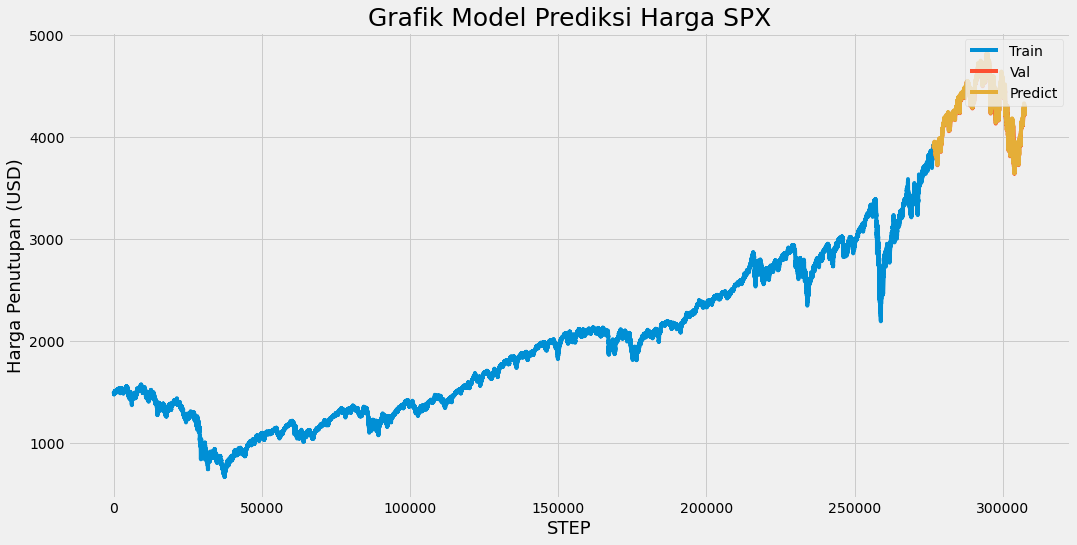

In [29]:
plt.figure(figsize=(16,8))
plt.title('Grafik Model Prediksi Harga SPX', fontsize=25)
plt.xlabel('STEP',fontsize=18)
plt.ylabel('Harga Penutupan (USD)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predict'], loc='upper right')
plt.show()

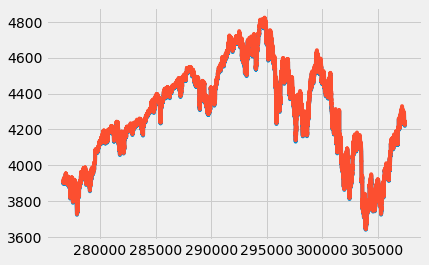

In [30]:
plt.plot(valid[['Close', 'Predictions']])